Aprendizaje Minibatch
===

Definición del problema de estimación de parámetros y función de pérdida
---

Se desean encontra los parámetros $w_0$ y $w_1$ del siguiente modelo de regresión entre las variables $x$ y $y$:

$$y_i = w_1 x_i + w_0 + e_i$$

a partir de un conjunto de observaciones $\{d_i, x_i\}$, donde $d_i$ es el valor real (observado), $y_i$ es su aproximación usando el modelo de regresión descrito, y $e_i$ es el error.

* Error instantáneo:

$$
e_i = d_i - y_i
$$

* Sumatoria del error cuadrático instantáneo:

$$
\begin{split}
\text{SSE}(w_0, w_1) & = \sum_i (d_i - y_i)^2 \\
    & =  \sum_i e_i^2
\end{split}
$$


Método del gradiente
---

* Aprendizaje Online:

$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$


* Aprendizaje Batch:

$$
\begin{split}
\mathbf{w}_k 
  & = \mathbf{w}_{k-1} - \mu \sum_i  \left( \frac{\partial}{\partial \mathbf{w}} e_i^2 \right)
\end{split}
$$

Minibatch
---

Para conjuntos de datos muy grandes el aprendizaje batch es muy costoso computacionalmente ya que deben recorrerse todos los datos, mientras que el aprendizaje online es muy lento en converger. Es en este caso, donde se toma un punto intermedio: 

* El conjunto de datos se divide en varios subconjuntos.

* Se ordenan aleatoriamente los subconjuntos de datos y luego se recorren uno a uno, tal como en el caso del gradiente descendente estocástico.

* Para el subconjunto actual, se computa el gradiente neto (tal como en el caso del aprendizaje batch) y se corrigen los parámetros.

* Se repite nuevamente el proceso hasta que el algoritmo converga.

Implementación
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [2]:
#
# Dataset
#
x_sample = [
    0.1087,
    0.2698,
    0.3765,
    0.2146,
    0.9155,
    0.0246,
    0.0221,
    0.8632,
    0.6460,
    0.2092,
    0.8567,
    0.1591,
    0.9647,
    0.6231,
    0.7460,
    0.3654,
    0.3065,
    0.6886,
    0.4966,
    0.2008,
    0.2618,
    0.7607,
    0.1563,
    0.4424,
    0.7731,
]

y_sample = [
    0.9519,
    1.1237,
    1.2360,
    1.0526,
    2.0743,
    0.7906,
    0.7603,
    2.0533,
    1.6887,
    1.0563,
    2.0991,
    0.8953,
    2.1917,
    1.6266,
    1.8508,
    1.2828,
    1.2283,
    1.8722,
    1.4657,
    1.0418,
    1.1097,
    1.7826,
    0.9711,
    1.4267,
    1.8248,
]

In [3]:
#
# Función auxiliar para computar el SSE
#
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def sse(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]
    squared_errors = [error ** 2 for error in errors]
    return sum(squared_errors)

In [4]:
#
# Función auxililar para graficar el contorno
#
def plot_contour():

    W0 = np.linspace(0.0, 2.0, 50)
    W1 = np.linspace(1.5, 3.2, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 40, 60, 80, 100, 120]

    fig, ax = plt.subplots(figsize=(3.5, 3.5))

    ax.set_aspect("equal", "box")
    ax.contourf(W0, W1, F, cmap=cm.Greys, levels=levels, alpha=0.8)
    ax.contour(W0, W1, F, colors="gray", levels=levels)
    ax.grid()
    ax.set_xlabel("w0")
    ax.set_ylabel("w1")

Cómputo del gradiente en el algoritmo minibatch y función de mejora
---

In [5]:
#
# Esta es el mismo computo que el empleado en el
# método batch.
#
def gradient(w0, w1, indices):

    x_batch = x_sample[indices]
    y_batch = y_sample[indices]

    y_forecasts = [w0 + w1 * x_value for x_value in x_batch]

    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_batch, y_forecasts)]

    gradient_w0 = -2 * sum(errors)
    gradient_w1 = -2 * sum([error * x_value for error, x_value in zip(errors, x_batch)])

    return gradient_w0, gradient_w1

In [6]:
def improve(w0, w1, mu, indices):

    gradient_w0, gradient_w1 = gradient(w0, w1, indices)

    w0 = w0 - mu * gradient_w0
    w1 = w1 - mu * gradient_w1

    return w0, w1

Particionamiento de los grupos
---

In [7]:
n_batches = 5
batch_indices = np.array_split(np.array(range(len(x_sample))), n_batches)
batch_indices

[array([0, 1, 2, 3, 4]),
 array([5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14]),
 array([15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24])]

Ejecución del algoritmo
---

 w0 = 0.6576
 w1 = 1.7088
SSE = 0.1586



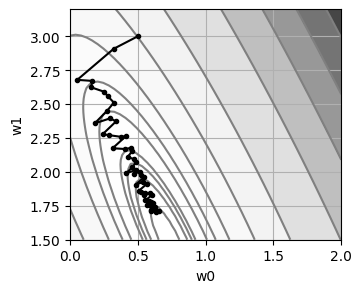

In [8]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history = {
    "w0": [w0],
    "w1": [w1],
    "sse": [sse(w0, w1)],
}

mu = 0.05

x_sample = np.array(x_sample)
y_sample = np.array(y_sample)

for epoch in range(10):

    for i_group in np.random.choice(n_batches, n_batches, replace=False):

        indices = list(batch_indices[i_group])

        w0, w1 = improve(w0, w1, mu, indices)

        history["w0"].append(w0)
        history["w1"].append(w1)
        history["sse"].append(sse(w0, w1))

print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, sse(w0, w1)))

plot_contour()
plt.plot(history["w0"], history["w1"], marker=".", color="black")
plt.show()

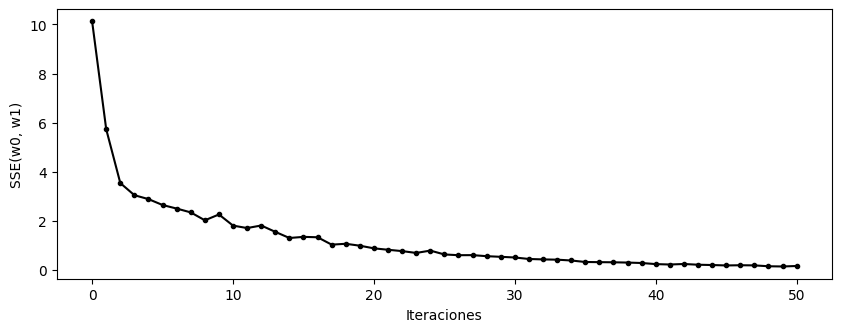

In [9]:
plt.figure(figsize=(10, 3.5))
plt.plot(history["sse"], ".-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.show()